In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/clean_data.csv", low_memory=False)

In [2]:
from datetime import datetime
import time
# Convert to unix timestamp
df['ts'] = pd.to_datetime(df['ts'], format='%Y-%m-%d %H:%M:%S')
df['ts'] = df['ts'].apply(lambda x: time.mktime(x.timetuple()))
df

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min
0,1.602295e+09,-1.0,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254
1,1.602385e+09,-1.0,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489
2,1.602398e+09,-1.0,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213
3,1.602851e+09,-1.0,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553
4,1.604029e+09,-1.0,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708324,1.613139e+09,99999.0,13.029848,77.593400,13.063751,77.589850,3.77,19,37,12,2,2021,4,1613158631,24,1498
3708325,1.613748e+09,99999.0,13.029296,77.592580,12.927923,77.627106,11.82,20,43,19,2,2021,4,1613767405,169,10146
3708326,1.613823e+09,99999.0,12.907576,77.600685,12.925874,77.607620,2.16,17,34,20,2,2021,5,1613842485,20,1251
3708327,1.614395e+09,99999.0,12.956665,77.521870,12.948099,77.562990,4.56,8,26,27,2,2021,5,1614414383,158,9531


In [3]:
# Separate features and target
features = ["ts", "pick_lat", "pick_lng"]
target = "dayofweek"  # Replace with your actual target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2)

# Scale features (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Train the model on the training data
model.fit(X_train, y_train)

GaussianNB()

In [5]:
# Make predictions
y_pred = model.predict(X_test_scaled)

/home/kakan/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [6]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
#print("AUC:", auc)

/home/kakan/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.14798575099842787
Precision: 0.021899782498568693
Recall: 0.14798575099842787
F1-score: 0.03815340474308498


/home/kakan/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


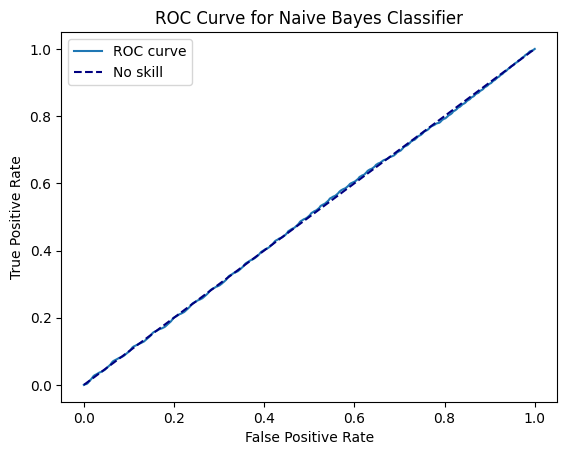

In [7]:
from sklearn.metrics import roc_curve
# ROC plot
plt.figure()
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.legend()
plt.show()